### 需求：股票分析
- 使用tushare包获取某股票的历史行情数据。
- 输出该股票所有收盘比开盘上涨3%以上的日期。
- 输出该股票所有开盘比前日收盘跌幅超过2%的日期。
- 假如我从2010年1月1日开始，每月第一个交易日买入1手股票，每年最后一个交易日卖出所有股票，到今天为止，我的收益如何？

- tushare财经数据接口包
    - pip install tushare

In [2]:
import tushare as ts
import pandas as pd
from pandas import DataFrame,Series
import numpy as np

In [3]:
#获取某只股票的历史行情数据
#code:字符串形式的股票代码
df = ts.get_k_data(code='600519',start='2000-01-01')
df

本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2


c:\Users\tigaly\AppData\Local\Programs\Python\Python310\lib\site-packages\tushare\stock\trading.py:706: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(_get_k_data(url, dataflag,
c:\Users\tigaly\AppData\Local\Programs\Python\Python310\lib\site-packages\tushare\stock\trading.py:706: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(_get_k_data(url, dataflag,
c:\Users\tigaly\AppData\Local\Programs\Python\Python310\lib\site-packages\tushare\stock\trading.py:706: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(_get_k_data(url, dataflag,
c:\Users\tigaly\AppData\Local\Programs\Python\Python310\lib\site-packages\tushare\stock\trading.py:706: FutureWarning: The frame.append method is

,date,open,close,high,low,volume,code
0,2001-08-27,-113.034,-112.849,-112.453,-113.329,406318.00,600519
1,2001-08-28,-112.949,-112.616,-112.591,-113.016,129647.79,600519
2,2001-08-29,-112.595,-112.702,-112.591,-112.751,53252.75,600519
3,2001-08-30,-112.719,-112.574,-112.501,-112.769,48013.06,600519
4,2001-08-31,-112.565,-112.590,-112.481,-112.627,23231.48,600519
...,...,...,...,...,...,...,...
5003,2022-08-01,1890.010,1890.300,1908.000,1881.180,21037.00,600519
5004,2022-08-02,1880.000,1879.980,1887.980,1858.010,28221.00,600519
5005,2022-08-03,1889.990,1885.000,1904.000,1877.000,24598.00,600519
5006,2022-08-04,1890.000,1916.010,1923.100,1880.130,30357.00,600519


In [4]:
#将互联网上获取的股票数据存储到本地
df.to_csv('./data/maotai.csv')#调用to_xxx方法将df中的数据写入到本地进行存储

In [11]:
#将本地存储的数据读入到df
df = pd.read_csv('./data/maotai.csv')
df.head()

,Unnamed: 0,date,open,close,high,low,volume,code
0,0,2001-08-27,-113.034,-112.849,-112.453,-113.329,406318.00,600519
1,1,2001-08-28,-112.949,-112.616,-112.591,-113.016,129647.79,600519
2,2,2001-08-29,-112.595,-112.702,-112.591,-112.751,53252.75,600519
3,3,2001-08-30,-112.719,-112.574,-112.501,-112.769,48013.06,600519
4,4,2001-08-31,-112.565,-112.590,-112.481,-112.627,23231.48,600519


需要对读取出来的数据进行相关的处理

In [14]:
#删除df中指定的一列
df.drop(labels='Unnamed: 0',axis=1,inplace=True)

In [80]:
#查看每一列的数据类型
df.loc['2010-01-29 00:00:00']

open          12.379
close         11.320
high          12.567
low           10.673
volume     37172.820
code      600519.000
Name: 2010-01-29 00:00:00, dtype: float64

In [16]:
#将date列转为时间序列类型
df['date'] = pd.to_datetime(df['date'])

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5008 entries, 0 to 5007
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    5008 non-null   datetime64[ns]
 1   open    5008 non-null   float64       
 2   close   5008 non-null   float64       
 3   high    5008 non-null   float64       
 4   low     5008 non-null   float64       
 5   volume  5008 non-null   float64       
 6   code    5008 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 274.0 KB


In [20]:
#将date列作为源数据的行索引
df.set_index('date',inplace=True)

In [21]:
df.head()

,open,close,high,low,volume,code
date,,,,,,
2001-08-27,-113.034,-112.849,-112.453,-113.329,406318.00,600519
2001-08-28,-112.949,-112.616,-112.591,-113.016,129647.79,600519
2001-08-29,-112.595,-112.702,-112.591,-112.751,53252.75,600519
2001-08-30,-112.719,-112.574,-112.501,-112.769,48013.06,600519
2001-08-31,-112.565,-112.590,-112.481,-112.627,23231.48,600519


In [26]:
#输出该股票所有收盘比开盘上涨3%以上的日期
#伪代码：（收盘-开盘）/开盘 > 0.03
(df['close'] - df['open']) / df['open'] > 0.03

#在分析的过程中如果产生了boolean值则下一步马上将布尔值作为源数据的行索引
 #如果布尔值作为df的行索引，则可以取出true对应的行数据，忽略false对应的行数据
df.loc[(df['close'] - df['open']) / df['open'] > 0.03] #获取了True对应的行数据（满足需求的行数据）

# df.loc[(df['close'] - df['open']) / df['open'] > 0.03].index #df的行数据

,open,close,high,low,volume,code
date,,,,,,
2006-05-25,-83.520,-87.585,-82.017,-88.704,198116.97,600519
2007-01-04,-49.703,-52.836,-49.576,-53.092,44664.67,600519
2007-01-23,-31.830,-38.231,-31.078,-39.117,41782.80,600519
2007-01-31,-36.337,-39.771,-34.685,-40.695,33267.84,600519
2007-02-02,-39.215,-41.446,-38.591,-42.198,14988.80,600519
...,...,...,...,...,...,...
2022-02-09,1817.415,1874.305,1886.325,1805.295,33885.00,600519
2022-03-01,1780.325,1836.805,1841.895,1780.325,47379.00,600519
2022-04-12,1707.325,1760.325,1766.295,1686.325,41630.00,600519


In [27]:
#输出该股票所有开盘比前日收盘跌幅超过2%的日期
#伪代码：(开盘-前日收盘)/前日收盘 < -0.02
(df['open'] - df['close'].shift(1))/df['close'].shift(1) < -0.02
#将布尔值作为源数据的行索引取出True对应的行数据
df.loc[(df['open'] - df['close'].shift(1))/df['close'].shift(1) < -0.02]

# df.loc[(df['open'] - df['close'].shift(1))/df['close'].shift(1) < -0.02].index

,open,close,high,low,volume,code
date,,,,,,
2006-04-17,-95.841,-95.841,-95.841,-95.841,238.10,600519
2006-04-18,-93.543,-93.543,-93.543,-93.543,324.44,600519
2006-04-19,-91.014,-91.014,-91.014,-91.286,43967.51,600519
2006-04-20,-88.636,-90.632,-88.636,-91.967,55615.01,600519
2006-05-25,-83.520,-87.585,-82.017,-88.704,198116.97,600519
...,...,...,...,...,...,...
2021-08-20,1533.495,1526.325,1575.875,1503.825,114545.00,600519
2021-11-01,1758.325,1781.325,1804.625,1738.325,41690.00,600519
2022-03-14,1708.325,1678.325,1728.325,1678.325,49007.00,600519


- 需求：假如我从2010年1月1日开始，每月第一个交易日买入1手股票，每年最后一个交易日卖出所有股票，到今天为止，我的收益如何？
- 分析：
    - 时间节点：2010-2020
    - 一手股票：100支股票
    - 买：
        - 一个完整的年需要买入1200支股票
    - 卖：
        - 一个完整的年需要卖出1200支股票
    - 买卖股票的单价：
        - 开盘价

In [34]:
new_df = df['2010-01':'2022']
new_df

,open,close,high,low,volume,code
date,,,,,,
2010-01-04,13.919,12.371,13.919,11.898,44304.88,600519
2010-01-05,13.160,11.996,13.543,11.665,31513.18,600519
2010-01-06,11.658,9.982,12.041,9.644,39889.03,600519
2010-01-07,9.982,7.698,10.305,6.316,48825.55,600519
2010-01-08,7.909,6.406,7.909,4.978,36702.09,600519
...,...,...,...,...,...,...
2022-08-01,1890.010,1890.300,1908.000,1881.180,21037.00,600519
2022-08-02,1880.000,1879.980,1887.980,1858.010,28221.00,600519
2022-08-03,1889.990,1885.000,1904.000,1877.000,24598.00,600519


In [66]:
new_df.iloc('30')

ValueError: No axis named 30 for object type DataFrame

In [84]:
#买股票：找每个月的第一个交易日对应的行数据（捕获到开盘价）==》每月的第一行数据
#根据月份从原始数据中提取指定的数据
#每月第一个交易日对应的行数据
df_monthly = new_df.resample('M').first()#数据的重新取样
df_monthly

,open,close,high,low,volume,code
date,,,,,,
2010-01-31,13.919,12.371,13.919,11.898,44304.88,600519
2010-02-28,11.575,11.582,12.101,10.170,29655.94,600519
2010-03-31,9.749,9.591,10.501,9.404,21734.74,600519
2010-04-30,3.987,4.948,5.279,3.972,23980.83,600519
2010-05-31,-19.146,-18.658,-17.967,-19.973,23975.16,600519
...,...,...,...,...,...,...
2022-04-30,1708.265,1758.335,1771.325,1700.015,44862.00,600519
2022-05-31,1808.325,1815.325,1848.325,1807.305,33661.00,600519
2022-06-30,1780.325,1766.575,1793.105,1757.325,21760.00,600519


In [83]:
#买入股票花费的总金额
cost = df_monthly['open'].sum()*100
cost

8211642.799999999

In [87]:
#卖出股票到手的钱
#特殊情况：2020年买入的股票卖不出去
#将2020年最后一行切出去
df_yearly = new_df.resample('A').last()[:-1]
df_yearly

,open,close,high,low,volume,code
date,,,,,,
2010-12-31,22.172,23.765,24.035,21.608,46084.0,600519
2011-12-31,46.568,47.064,48.370,44.337,29460.0,600519
2012-12-31,66.904,63.359,68.136,61.152,51914.0,600519
2013-12-31,-1.601,2.019,2.788,-2.840,57546.0,600519
2014-12-31,68.262,71.917,72.262,67.717,46269.0,600519
2015-12-31,121.731,121.701,123.011,121.331,19673.0,600519
2016-12-31,236.292,243.832,244.972,236.292,34687.0,600519
2017-12-31,634.469,613.959,642.969,608.069,76038.0,600519
2018-12-31,490.768,517.478,523.868,487.468,63678.0,600519


In [88]:
#卖出股票到手的钱
resv = df_yearly['close'].sum()*1200
resv

8178549.6

In [90]:
#最后手中剩余的股票需要估量其价值计算到总收益中
#使用昨天的收盘价作为剩余股票的单价
last_monry = 800*new_df['close'][-1]

In [91]:
#计算总收益
resv+last_monry-cost

1506074.8000000007

### 需求：双均线策略制定

- 使用tushare包获取某股票的历史行情数据

In [92]:
df = pd.read_csv('./data/maotai.csv').drop(labels='Unnamed: 0',axis=1)
df

,date,open,close,high,low,volume,code
0,2001-08-27,-113.034,-112.849,-112.453,-113.329,406318.00,600519
1,2001-08-28,-112.949,-112.616,-112.591,-113.016,129647.79,600519
2,2001-08-29,-112.595,-112.702,-112.591,-112.751,53252.75,600519
3,2001-08-30,-112.719,-112.574,-112.501,-112.769,48013.06,600519
4,2001-08-31,-112.565,-112.590,-112.481,-112.627,23231.48,600519
...,...,...,...,...,...,...,...
5003,2022-08-01,1890.010,1890.300,1908.000,1881.180,21037.00,600519
5004,2022-08-02,1880.000,1879.980,1887.980,1858.010,28221.00,600519
5005,2022-08-03,1889.990,1885.000,1904.000,1877.000,24598.00,600519
5006,2022-08-04,1890.000,1916.010,1923.100,1880.130,30357.00,600519


In [93]:
#将date列转为时间序列且将其作为源数据的行索引
df['date'] = pd.to_datetime(df['date'])

In [94]:
df.set_index('date',inplace=True)

In [95]:
df.head()

,open,close,high,low,volume,code
date,,,,,,
2001-08-27,-113.034,-112.849,-112.453,-113.329,406318.00,600519
2001-08-28,-112.949,-112.616,-112.591,-113.016,129647.79,600519
2001-08-29,-112.595,-112.702,-112.591,-112.751,53252.75,600519
2001-08-30,-112.719,-112.574,-112.501,-112.769,48013.06,600519
2001-08-31,-112.565,-112.590,-112.481,-112.627,23231.48,600519


- 计算该股票历史数据的5日均线和30日均线
    - 什么是均线？
        - 对于每一个交易日，都可以计算出前N天的移动平均值，然后把这些移动平均值连起来，成为一条线，就叫做N日移动平均线。移动平均线常用线有5天、10天、30天、60天、120天和240天的指标。
       - 5天和10天的是短线操作的参照指标，称做日均线指标；
       - 30天和60天的是中期均线指标，称做季均线指标；
       - 120天和240天的是长期均线指标，称做年均线指标。
    - 均线计算方法：MA=（C1+C2+C3+...+Cn)/N C:某日收盘价 N:移动平均周期（天数）

In [96]:
ma5 = df['close'].rolling(5).mean()
ma30 = df['close'].rolling(30).mean()

In [97]:
ma5

date
2001-08-27          NaN
2001-08-28          NaN
2001-08-29          NaN
2001-08-30          NaN
2001-08-31    -112.6662
                ...    
2022-08-01    1911.3100
2022-08-02    1897.2640
2022-08-03    1890.3440
2022-08-04    1893.9460
2022-08-05    1899.0500
Name: close, Length: 5008, dtype: float64

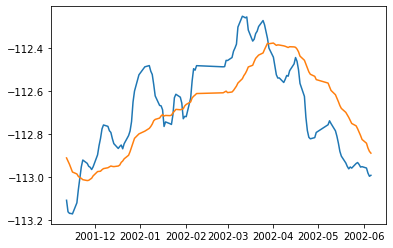

In [98]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(ma5[50:180])
plt.plot(ma30[50:180])

- 分析输出所有金叉日期和死叉日期
    - 股票分析技术中的金叉和死叉，可以简单解释为：
        - 分析指标中的两根线，一根为短时间内的指标线，另一根为较长时间的指标线。
        - 如果短时间的指标线方向拐头向上，并且穿过了较长时间的指标线，这种状态叫“金叉”；
        - 如果短时间的指标线方向拐头向下，并且穿过了较长时间的指标线，这种状态叫“死叉”；
        - 一般情况下，出现金叉后，操作趋向买入；死叉则趋向卖出。当然，金叉和死叉只是分析指标之一，要和其他很多指标配合使用，才能增加操作的准确性。

In [99]:
ma5 = ma5[30:]
ma30 = ma30[30:]

In [100]:
s1 = ma5 < ma30
s2 = ma5 > ma30

In [102]:
s2

date
2001-10-15    False
2001-10-16    False
2001-10-17    False
2001-10-18    False
2001-10-19    False
              ...  
2022-08-01    False
2022-08-02    False
2022-08-03    False
2022-08-04    False
2022-08-05    False
Name: close, Length: 4978, dtype: bool

In [103]:
df = df[30:]

In [106]:
death_ex = s1 & s2.shift(1) #判定死叉的条件
df.loc[death_ex] #死叉对应的行数据
death_date = df.loc[death_ex].index

In [107]:
golden_ex = ~(s1 | s2.shift(1))#判定金叉的条件
golden_date = df.loc[golden_ex].index #金叉的时间
df.loc[golden_ex]

,open,close,high,low,volume,code
date,,,,,,
2001-11-22,-112.908,-112.925,-112.893,-112.963,4198.79,600519
2002-01-24,-112.527,-112.540,-112.437,-112.627,26615.80,600519
2002-02-04,-112.559,-112.428,-112.387,-112.591,16510.19,600519
2002-06-21,-112.947,-112.860,-112.822,-112.968,4266.51,600519
2002-12-05,-113.903,-113.762,-113.707,-113.918,13020.18,600519
...,...,...,...,...,...,...
2021-05-20,2033.032,2017.912,2033.132,2004.392,21857.00,600519
2021-09-16,1581.325,1616.395,1622.325,1563.325,45968.00,600519
2021-11-23,1830.325,1874.755,1895.325,1830.325,45782.00,600519


- 如果我从假如我从2010年1月1日开始，初始资金为100000元，金叉尽量买入，死叉全部卖出，则到今天为止，我的炒股收益率如何？
- 分析：
    - 买卖股票的单价使用开盘价
    - 买卖股票的时机
    - 最终手里会有剩余的股票没有卖出去
        - 会有。如果最后一天为金叉，则买入股票。估量剩余股票的价值计算到总收益。
            - 剩余股票的单价就是用最后一天的收盘价。

In [112]:
s1 = Series(data=1,index=golden_date) #1作为金叉的标识
s2 = Series(data=0,index=death_date) #0作为死叉的标识

s = s1.append(s2)
s = s.sort_index() #存储的是金叉和死叉对应的时间

C:\Users\tigaly\AppData\Local\Temp\ipykernel_19864\884914908.py:4: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s = s1.append(s2)


In [126]:
s = s['2015':'2022']##存储的是金叉和死叉对应的时间
s

date
2015-01-19    0
2015-02-13    1
2015-06-17    0
2015-07-15    1
2015-07-17    0
             ..
2022-01-06    0
2022-04-07    1
2022-05-13    0
2022-06-02    1
2022-07-21    0
Length: 73, dtype: int64

In [130]:
first_monry = 100000 #本金，不变
money = first_monry #可变的，买股票话的钱和卖股票收入的钱都从该变量中进行操作
hold = 0 #持有股票的数量（股数：100股=1手）

for i in range(len(s)): #i表示的s这个Series中的隐式索引
    #i = 0(死叉：卖) = 1（金叉：买）
    if s[i] == 1:#金叉的时间
        #基于100000的本金尽可能多的去买入股票
        #获取股票的单价（金叉时间对应的行数据中的开盘价）
        time = s.index[i] #金叉的时间
        p = df.loc[time]['open'] #股票的单价
        hand_count = money // (p*100) #使用100000最多买入多少手股票
        hold = hand_count * 100 
        
        money -= (hold * p) #将买股票话的钱从money中减去
    else:
        #将买入的股票卖出去
        
        #找出卖出股票的单价
        death_time = s.index[i]
        p_death = df.loc[death_time]['open'] #卖股票的单价
        money += (p_death * hold) #卖出的股票收入加入到money
        hold = 0

#如何判定最后一天为金叉还是死叉
last_monry = hold * df['close'][-1] #剩余股票的价值

#总收益
money + last_monry - first_monry

3056956.0